In [3]:
# **Forest fire detection using DS and CNN by Aditya and Srushti**

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

2023-12-15 09:43:37.228001: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-15 09:43:37.423448: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-15 09:43:37.423481: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-15 09:43:37.452680: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-15 09:43:37.512336: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-15 09:43:37.513200: I tensorflow/core/platform/cpu_feature_guard.cc:1

datasets for training and testing

In [4]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("/home/aditya/Desktop/5TH_SEM_Assignments/AI_Project/forest_fire/Training and Validation",
                                          target_size=(150,150),
                                          batch_size = 32,
                                          class_mode = 'binary')
                                         
test_dataset = test.flow_from_directory("/home/aditya/Desktop/5TH_SEM_Assignments/AI_Project/forest_fire/Testing",
                                          target_size=(150,150),
                                          batch_size =32,
                                          class_mode = 'binary')

FileNotFoundError: [Errno 2] No such file or directory: '/forest_fire/Training and Validation'

In [ ]:
test_dataset.class_indices

{'fire': 0, 'nofire': 1}

Model Building



In [ ]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

Compiling the model



In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Fitting the model



In [ ]:
r = model.fit(train_dataset,
         epochs = 10,
         validation_data = test_dataset)

Epoch 1/10
58/58 [==============================] - 26s 190ms/step - loss: 0.2785 - accuracy: 0.8799 - val_loss: 0.2471 - val_accuracy: 0.8971
Epoch 2/10
58/58 [==============================] - 5s 78ms/step - loss: 0.1469 - accuracy: 0.9514 - val_loss: 0.5288 - val_accuracy: 0.7647
Epoch 3/10
58/58 [==============================] - 4s 76ms/step - loss: 0.1544 - accuracy: 0.9487 - val_loss: 0.3090 - val_accuracy: 0.8824
Epoch 4/10
58/58 [==============================] - 5s 80ms/step - loss: 0.0992 - accuracy: 0.9683 - val_loss: 0.1916 - val_accuracy: 0.9118
Epoch 5/10
58/58 [==============================] - 5s 81ms/step - loss: 0.0791 - accuracy: 0.9716 - val_loss: 0.2067 - val_accuracy: 0.9118
Epoch 6/10
58/58 [==============================] - 5s 79ms/step - loss: 0.0805 - accuracy: 0.9722 - val_loss: 0.1287 - val_accuracy: 0.9559
Epoch 7/10
58/58 [==============================] - 5s 78ms/step - loss: 0.0876 - accuracy: 0.9754 - val_loss: 0.2165 - val_accuracy: 0.8824
Epoch 8/10


Predicting on Test Dataset



In [ ]:
predictions = model.predict(test_dataset)
predictions = np.round(predictions)

3/3 [==============================] - 0s 41ms/step


In [ ]:
predictions


array([[1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.]], dtype=float32)

In [ ]:
print(len(predictions))


68


Plotting loss per iteration

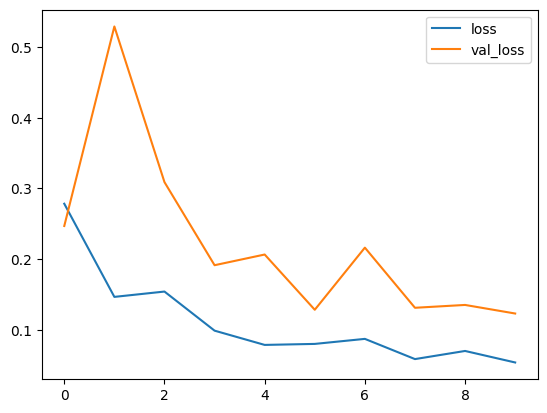

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

Plotting accuracy per iteration



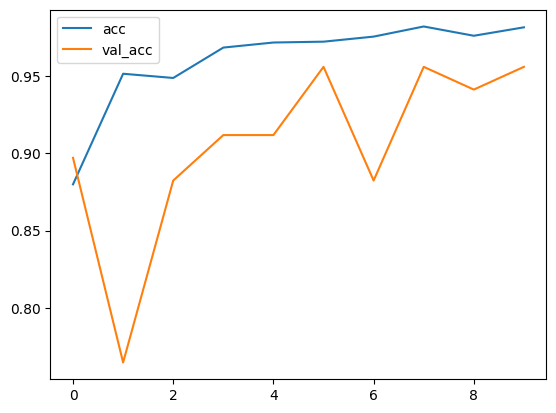

In [ ]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Making a function to see any image from dataset with predicted label

In [ ]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    plt.imshow(img1)
    Y = image.img_to_array(img1)
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        plt.xlabel("No Fire",fontsize=32)
    elif val == 0:
        plt.xlabel("Fire",fontsize=32)

1/1 [==============================] - 0s 219ms/step
[[0.]]


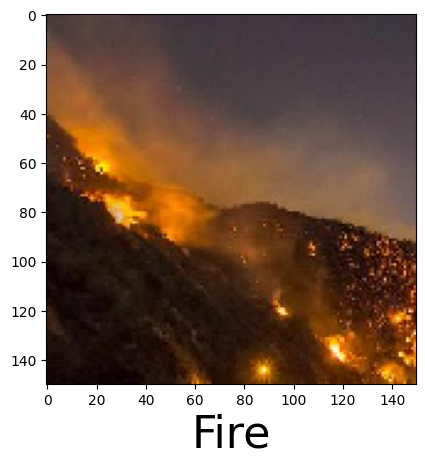

In [ ]:
predictImage("/kaggle/input/fire-detection-image-data/forest_fire/Testing/fire/abc181.jpg")

1/1 [==============================] - 0s 23ms/step
[[1.]]


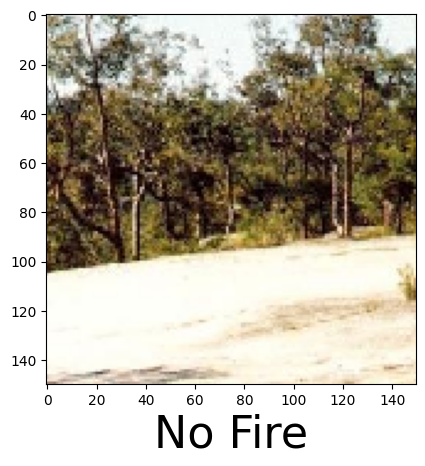

In [ ]:
predictImage("/kaggle/input/fire-detection-image-data/forest_fire/Testing/nofire/abc361.jpg")